In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('라면을 많이 먹다')

라면을 많이 먹다


In [3]:
data=pd.read_csv('ramen-ratings.csv')
data.head(10)

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
5,2575,Samyang Foods,Kimchi song Song Ramen,Pack,South Korea,4.75,NaN
6,2574,Acecook,Spice Deli Tantan Men With Cilantro,Cup,Japan,4,NaN
7,2573,Ikeda Shoku,Nabeyaki Kitsune Udon,Tray,Japan,3.75,NaN
8,2572,Ripe'n'Dry,Hokkaido Soy Sauce Ramen,Pack,Japan,0.25,NaN
9,2571,KOKA,The Original Spicy Stir-Fried Noodles,Pack,Singapore,2.5,NaN


In [4]:
data.dtypes

Review #     int64
Brand       object
Variety     object
Style       object
Country     object
Stars       object
Top Ten     object
dtype: object

In [5]:
data.shape

(2580, 7)

In [6]:
data.isnull().sum()

Review #       0
Brand          0
Variety        0
Style          2
Country        0
Stars          0
Top Ten     2539
dtype: int64

In [7]:
data.describe()

,Review #
count,2580.000000
mean,1290.500000
std,744.926171
min,1.000000
25%,645.750000
50%,1290.500000
75%,1935.250000
max,2580.000000


In [8]:
data['Style'].fillna(0,inplace= True)

# Plot Ramen varients across different countries

In [9]:
print(str(len(data.Brand.unique()))+' Different Brands')
print(str(len(data.Variety.unique()))+' Different Varieties')
print(str(len(data.Style.unique()))+' Different Styles')
print(str(len(data.Country.unique()))+' Different Countries')

355 Different Brands
2413 Different Varieties
8 Different Styles
38 Different Countries


<function matplotlib.pyplot.show(close=None, block=None)>

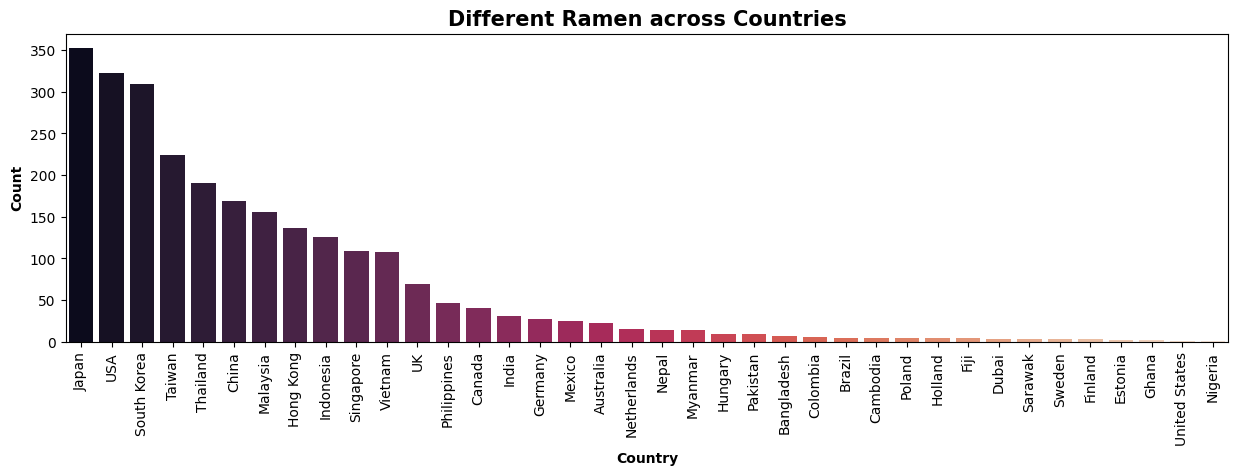

In [10]:
fig, ax = plt.subplots(figsize=(15,4))
sns.countplot(data=data, x='Country', palette='rocket', order = data['Country'].value_counts().index)
plt.xlabel('Country', fontsize=10, fontweight='bold')
plt.xticks(rotation=90)
plt.ylabel('Count', fontsize=10, fontweight='bold')
plt.title('Different Ramen across Countries', fontweight= 'bold', fontsize='15')
plt.show

In [11]:
toptenramen = data.dropna()
toptenramen.sort_values(by=['Top Ten'], ascending=False)
toptenramen.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
616,1964,MAMA,Instant Noodles Coconut Milk Flavour,Pack,Myanmar,5,2016 #10
633,1947,Prima Taste,Singapore Laksa Wholegrain La Mian,Pack,Singapore,5,2016 #1
655,1925,Prima,Juzz's Mee Creamy Chicken Flavour,Pack,Singapore,5,2016 #8
673,1907,Prima Taste,Singapore Curry Wholegrain La Mian,Pack,Singapore,5,2016 #5
752,1828,Tseng Noodles,Scallion With Sichuan Pepper Flavor,Pack,Taiwan,5,2016 #9


In [12]:
toptenramen.shape

(41, 7)

In [13]:
toptenramen.dtypes

Review #     int64
Brand       object
Variety     object
Style       object
Country     object
Stars       object
Top Ten     object
dtype: object

In [14]:
toptenramen['Top Ten'] = toptenramen['Top Ten'].astype(str)
toptenramen.dtypes

C:\Users\DELL\AppData\Local\Temp\ipykernel_146888\1739013152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toptenramen['Top Ten'] = toptenramen['Top Ten'].astype(str)


Review #     int64
Brand       object
Variety     object
Style       object
Country     object
Stars       object
Top Ten     object
dtype: object

In [16]:
def get_year(tt):
  return tt.split('#')[0]
  
def get_rating(tt):
  return tt.split('#')[-1]


toptenramen['Rating'] = toptenramen['Top Ten'].apply(lambda x: f"{get_rating(x)}")
toptenramen['Year'] = toptenramen['Top Ten'].apply(lambda x: f"{get_year(x)}")
toptenramen.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_146888\2879862615.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toptenramen['Rating'] = toptenramen['Top Ten'].apply(lambda x: f"{get_rating(x)}")
C:\Users\DELL\AppData\Local\Temp\ipykernel_146888\2879862615.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toptenramen['Year'] = toptenramen['Top Ten'].apply(lambda x: f"{get_year(x)}")


,Review #,Brand,Variety,Style,Country,Stars,Top Ten,Rating,Year
616,1964,MAMA,Instant Noodles Coconut Milk Flavour,Pack,Myanmar,5,2016 #10,10,2016
633,1947,Prima Taste,Singapore Laksa Wholegrain La Mian,Pack,Singapore,5,2016 #1,1,2016
655,1925,Prima,Juzz's Mee Creamy Chicken Flavour,Pack,Singapore,5,2016 #8,8,2016
673,1907,Prima Taste,Singapore Curry Wholegrain La Mian,Pack,Singapore,5,2016 #5,5,2016
752,1828,Tseng Noodles,Scallion With Sichuan Pepper Flavor,Pack,Taiwan,5,2016 #9,9,2016


Text(0.5, 1.0, 'Top 10 Ramen Across Countries')

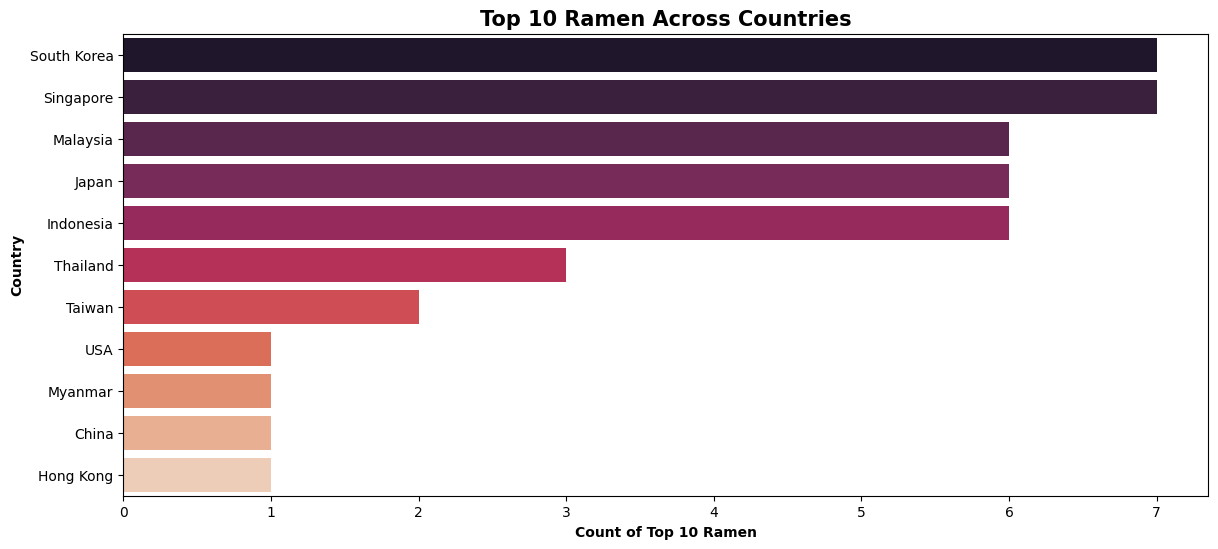

In [17]:
plt.figure(figsize=(14,6))
sns.countplot(data=toptenramen, y="Country", order=toptenramen["Country"].value_counts().index, palette='rocket')
plt.xlabel('Count of Top 10 Ramen', fontsize = 10, fontweight= 'bold')
plt.ylabel('Country', fontsize = 10, fontweight = 'bold')
plt.title('Top 10 Ramen Across Countries', fontweight = 'bold', fontsize = 15)

## Ramens made from South Korea are most frequently nominated in the Top Ten list, followed by Singapore, Indonesia

<function matplotlib.pyplot.show(close=None, block=None)>

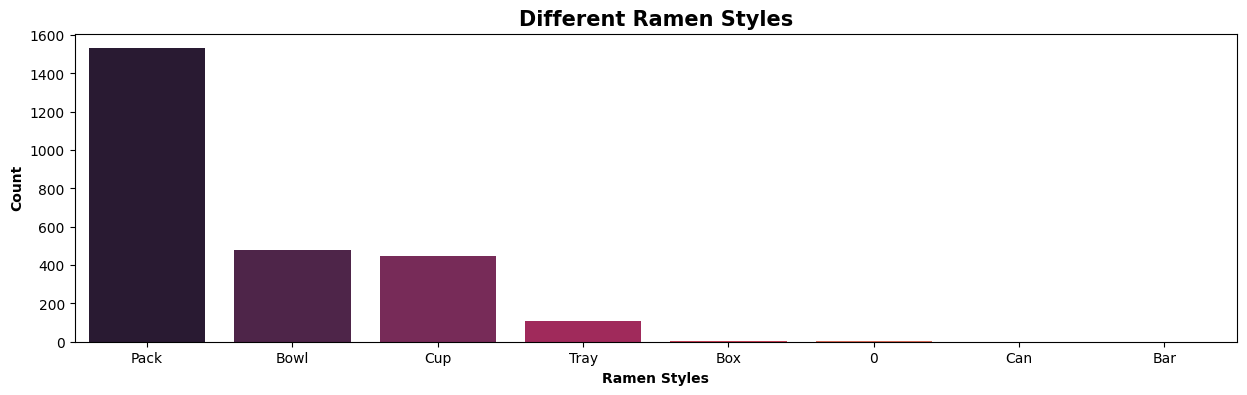

In [18]:
fig, ax = plt.subplots(figsize=(15,4))
sns.countplot(data=data, x='Style', palette='rocket', order = data['Style'].value_counts().index)
plt.xlabel('Ramen Styles', fontsize=10, fontweight='bold')
plt.ylabel('Count', fontsize=10, fontweight='bold')
plt.title('Different Ramen Styles', fontweight= 'bold', fontsize='15')
plt.show

## Pack Style is having high count of popularity

In [19]:
star_float= []

for i in data['Stars']:
  if i == 'Unrated':
    star_float.append(0.00)
  else:
    star_float.append(float(i))

data['Stars']=star_float
data.dtypes

Review #      int64
Brand        object
Variety      object
Style        object
Country      object
Stars       float64
Top Ten      object
dtype: object

In [20]:
data['Stars']=data['Stars'].astype(float)

In [21]:
fivestar= data[data['Stars']==5]
fivestar

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
10,2570,Tao Kae Noi,Creamy tom Yum Kung Flavour,Pack,Thailand,5.0,NaN
11,2569,Yamachan,Yokohama Tonkotsu Shoyu,Pack,USA,5.0,NaN
14,2566,Nissin,Demae Ramen Bar Noodle Aka Tonkotsu Flavour In...,Pack,Hong Kong,5.0,NaN
17,2563,Yamachan,Tokyo Shoyu Ramen,Pack,USA,5.0,NaN
21,2559,Jackpot Teriyaki,Beef Ramen,Pack,USA,5.0,NaN
...,...,...,...,...,...,...,...
2530,50,Indomie,Mi Goreng,Pack,Indonesia,5.0,NaN
2533,47,Indomie,Mi Goreng Jumbo Barbecue Chicken,Pack,Indonesia,5.0,2012 #2
2535,45,Indomie,Mi Goreng Sate,Pack,Indonesia,5.0,\n
2552,28,Nissin,Chikin Ramen,Pack,Japan,5.0,NaN


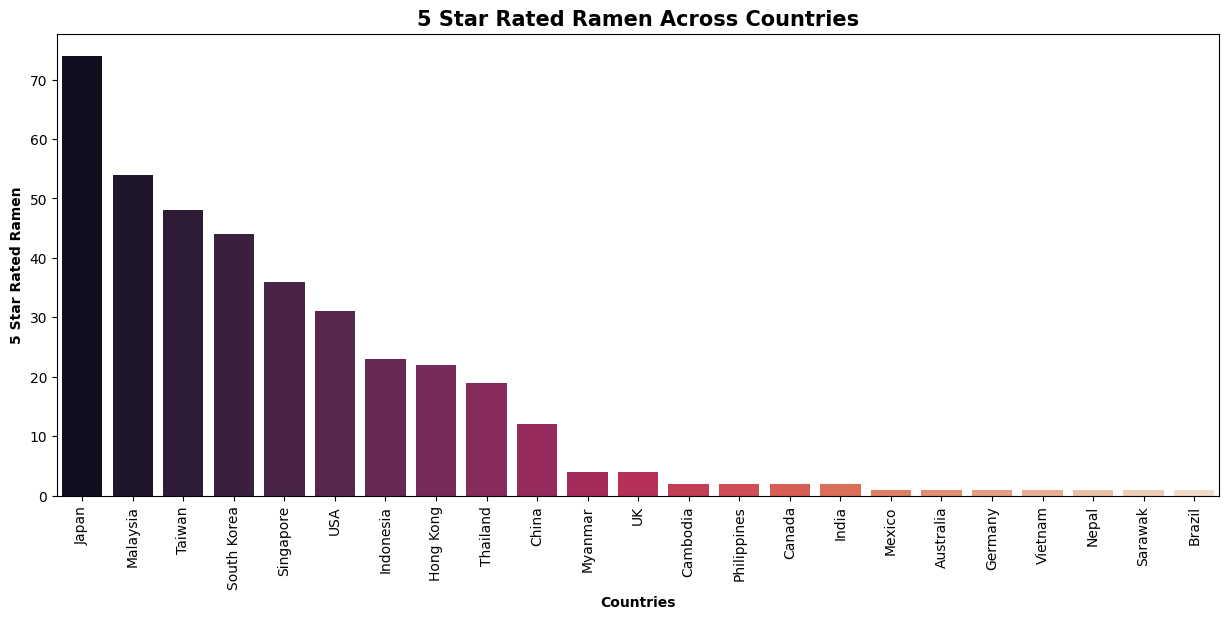

In [22]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x=fivestar['Country'], palette='rocket', order = fivestar['Country'].value_counts().index)
plt.xticks(rotation = 90)
plt.xlabel('Countries', fontsize = 10, fontweight = 'bold')
plt.ylabel('5 Star Rated Ramen', fontsize = 10, fontweight = 'bold')
plt.title('5 Star Rated Ramen Across Countries', fontweight = 'bold', fontsize = 15)
plt.show()

Japan has highest number of 5 Star rated ramen brands

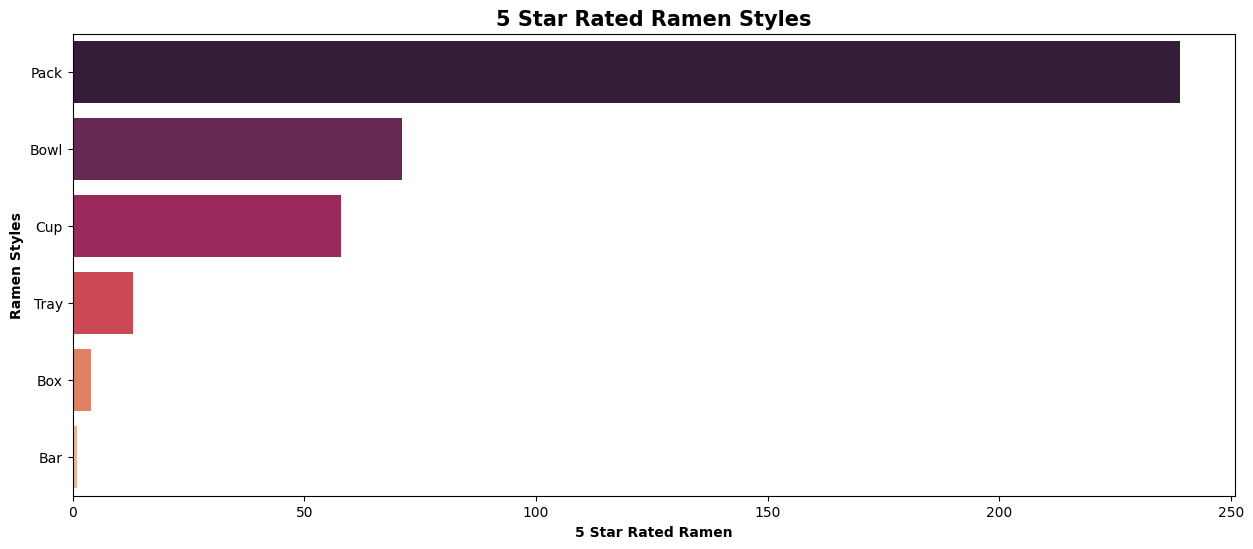

In [23]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(y=fivestar['Style'], order=fivestar['Style'].value_counts().index, palette='rocket')
plt.xlabel('5 Star Rated Ramen', fontsize = 10, fontweight = 'bold')
plt.ylabel('Ramen Styles', fontsize = 10, fontweight = 'bold')
plt.title('5 Star Rated Ramen Styles', fontweight = 'bold', fontsize = 15)
plt.show()

Pack style ramen is preferred more for packaging.


In [24]:
avg_stars=data.groupby('Country').mean().sort_values(by=['Stars'],ascending=False)
avg_stars.head()

,Review #,Stars
Country,,
Brazil,2093.600000,4.350000
Sarawak,1707.333333,4.333333
Cambodia,1822.400000,4.200000
Malaysia,1623.602564,4.127564
Singapore,1702.917431,4.126147
